<h1>🧽 Data Cleaning - Dataset B (0001-14220) 🧽</h1>

Perform data cleaning on a segment in Dataset B.

<h2>🗃 Import Libraries</h2>

In [1]:
#pip install geopandas matplotlib folium shapely

In [2]:
#pip install xlsxwriter

In [102]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import webbrowser
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm import tqdm

<h2>📤 Upload Dataset</h2>

In [4]:
B_Original_df = pd.read_csv("datasets\input\Dataset_BG.csv")

<h2>🔍 Inspect Dataset</h2>

<h3>Check Data Types</h3>

In [5]:
B_Original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14219 entries, 0 to 14218
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Business Model  14219 non-null  object 
 1   Categories      14186 non-null  object 
 2   Subcategory     5981 non-null   object 
 3   Company Name    14217 non-null  object 
 4   Address         14219 non-null  object 
 5   Latitude        14195 non-null  float64
 6   Longitude       14195 non-null  float64
 7   State           14218 non-null  object 
 8   Country         14219 non-null  object 
 9   Contact no.     7092 non-null   object 
 10  FAX             309 non-null    object 
 11  Website         2623 non-null   object 
 12  E-mail          1103 non-null   object 
 13  Capital $       7294 non-null   object 
 14  Employee        6024 non-null   object 
dtypes: float64(2), object(13)
memory usage: 1.6+ MB


<h3>Check For Null Values</h3>

In [6]:
B_Original_df.isnull().any()

Business Model    False
Categories         True
Subcategory        True
Company Name       True
Address           False
Latitude           True
Longitude          True
State              True
Country           False
Contact no.        True
FAX                True
Website            True
E-mail             True
Capital $          True
Employee           True
dtype: bool

<h3>Summarize Dataset</h3>

In [7]:
B_Original_df.describe()

,Latitude,Longitude
count,14195.000000,14195.000000
mean,50.692553,4.529144
std,2.063530,3.663873
min,-3.615000,-121.350154
25%,50.710539,3.648227
50%,50.916449,4.390559
75%,51.121726,5.064513
max,69.973318,39.468808


<h3>Check Random Samples</h3>

In [8]:
B_Original_df.sample(5)

,Business Model,Categories,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact no.,FAX,Website,E-mail,Capital $,Employee
1945,OEM,Food & Beverage Machinery,NaN,I.D.D (Illumination Design And Development),"Putsesteenweg,Kalmthout,Belgium,2920",51.382954,4.452221,Kalmthout,Belgium,#ERROR!,NaN,NaN,NaN,NaN,NaN
9633,OEM,Printing & Binding Machinery,NaN,Etilux,"Rue de l'Espérance 42,Liège,Belgium,4000",50.641259,5.546210,Liège,Belgium,32 4 224 99 99,NaN,NaN,NaN,NaN,NaN
3513,OEM,Freezing & Air Conditioning Equipment,"Floor laying and floor work, nec",Max's Construct,"Rue Joseph Massart,Namur,Belgium,5020",50.434320,4.795585,Namur,Belgium,"108,000.00",NaN,NaN,NaN,"108,000.00",2
614,OEM,Boilers,Electrical work,Dieter Verstraete,"Koolskampstraat 6,Torhout,Belgium,8820",51.054462,3.114036,Torhout,Belgium,32 50 21 68 31,NaN,https://www.researchportal.be/en/404-page-not-...,NaN,"69,000.00",1
3779,OEM,Freezing & Air Conditioning Equipment,NaN,CABETEC,"Avenue du Centenaire 288,Charleroi,Belgium,6061",50.412194,4.477739,Charleroi,Belgium,NaN,NaN,NaN,NaN,NaN,NaN


<h2>🧼 Clean Dataset</h2>

<h3>✂️ Remove Irrelevant Data</h3>

<h4>Confirm Shape</h4>

In [9]:
B_Original_df.shape

(14219, 15)

<h4>Peek Dataframe</h4>

In [10]:
B_Original_df.head(3)

,Business Model,Categories,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact no.,FAX,Website,E-mail,Capital $,Employee
0,OEM,Agricultural Machinery,"Durable goods, nec",ener Sinan,"Breughelpark 1, Internal Mail Reference 34,Zel...",50.884504,4.271891,Zellik,Belgium,32 497255932,NaN,NaN,NaN,"141,353.00",1
1,OEM,Agricultural Machinery,"Iron work, structural , Fabricated structural ...",Constructiewerken De Meyer,"Frank Van Dyckelaan 28,Temse,Belgium,9140",51.117833,4.195308,Temse,Belgium,32 3 766 33 33,NaN,NaN,NaN,NaN,NaN
2,OEM,Agricultural Machinery,Farm machinery and equipment,CNH Industrial - Zedelgem,"Léon Claeysstraat 3 A,Zedelgem,Belgium,8210",51.129273,3.161403,Zedelgem,Belgium,32 5 025 31 11,NaN,https://www.cnhindustrial.com/,NaN,"2,164,409,300.00",3523


In [11]:
B_Original_df.tail(3)

,Business Model,Categories,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact no.,FAX,Website,E-mail,Capital $,Employee
14216,System Integrator,NaN,Rockwell automation,Agidens Process Automation NV\n,"Baarbeek 1\nZwijndrecht, 2070\nBelgium",51.212708,4.344139,Zwijndrecht,Belgium,3236411770,NaN,http://www.agidens.com,NaN,NaN,NaN
14217,System Integrator,NaN,Rockwell automation,Devion BVBA\n,"Onledegoedstraat 86\nRoeselare, 8800\nBelgium",50.980596,3.133031,Roeselare,Belgium,3257400864,NaN,http://www.devion.be,NaN,NaN,NaN
14218,System Integrator,NaN,Rockwell automation,DYNAMICS BVBA\n,"Krommebeekstraat 48\nMenen, 8930\nBelgium",50.811990,3.123278,Menen,Belgium,3256428100,NaN,http://www.dynamics.be,NaN,NaN,NaN


<h4>Rename Column From 'Capital USD $' To 'Annual Sales'</h4>

In [12]:
B_Original_df.rename(columns={'Capital $': 'Annual Sales'}, inplace=True)

<h4>Rename Column From 'Employee' To 'Employees'</h4>

In [13]:
B_Original_df.rename(columns={'Employee': 'Employees'}, inplace=True)

<h4>Rename Column From 'Contact no.' To 'Contact No.'</h4>

In [14]:
B_Original_df.rename(columns={'Contact no.': 'Contact No.'}, inplace=True)

<h4>Rename Column From 'FAX' To 'Fax No.'</h4>

In [15]:
B_Original_df.rename(columns={'FAX': 'Fax No.'}, inplace=True)

<h4>Rename Column From 'Categories' To 'Category'</h4>

In [16]:
B_Original_df.rename(columns={'Categories': 'Category'}, inplace=True)

In [17]:
B_Original_df.sample(5)

,Business Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,E-mail,Annual Sales,Employees
12235,OEM,Machinery for Processing Plastics,NaN,PRECICAL,"Rue du Tilleul 33,Oupeye,Belgium,4681",50.701085,5.672052,Oupeye,Belgium,32 4 374 93 70,NaN,NaN,NaN,"US$ 2,186,200.00",NaN
12642,OEM,"Repair, Maintenance & Installation of Machinery",NaN,S.P.R.L. BERTRAND - DARIMONT,"Rue Zénobe Gramme 35,Dison,Belgium,4821",50.629898,5.882429,Dison,Belgium,NaN,NaN,NaN,NaN,NaN,NaN
313,OEM,Boilers,"Sheet Metal work, nec",AZA Technic,"Zegestraat 19,Diepenbeek,Belgium,3590",50.905413,5.407122,Diepenbeek,Belgium,NaN,NaN,NaN,NaN,"57,000.00",1
14011,OEM,Textile Machinery,NaN,Werkhuizen Lapauw,"Oude Ieperseweg,Kortrijk,Belgium,8501",50.835728,3.220875,Kortrijk,Belgium,32 5 635 42 95,NaN,NaN,NaN,NaN,NaN
6789,OEM,Internal Combustion Engines,Electrical work,Coumans Senna,"Dommellaan 48,Peer,Belgium,3990",51.182316,5.439638,Peer,Belgium,NaN,NaN,NaN,NaN,NaN,1


<h4>Remove Newline Characters</h4>

In [18]:
B_Original_df = B_Original_df.map(lambda x: x.replace('\n', '') if isinstance(x, str) else x)

In [19]:
B_Original_df = B_Original_df.map(lambda x: x.replace('\t', '') if isinstance(x, str) else x)

In [20]:
B_Original_df = B_Original_df.map(lambda x: x.replace('\r', '') if isinstance(x, str) else x)

In [21]:
B_Original_df.tail(5)

,Business Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,E-mail,Annual Sales,Employees
14214,System Integrator,NaN,Rockwell automation,EVOLUSYS SPRL,"R Du Parc Industriel 2aAmay, Liege 4540Belgium",50.544677,5.328130,Liege,Belgium,3285278410,NaN,http://www.evolusys.be,NaN,NaN,NaN
14215,System Integrator,NaN,Rockwell automation,BELLT GCA NV,"Zandhovensebaan 29Schilde, 2970Belgium",51.237592,4.597704,Schilde,Belgium,3233800880,NaN,http://www.bellt.be,NaN,NaN,NaN
14216,System Integrator,NaN,Rockwell automation,Agidens Process Automation NV,"Baarbeek 1Zwijndrecht, 2070Belgium",51.212708,4.344139,Zwijndrecht,Belgium,3236411770,NaN,http://www.agidens.com,NaN,NaN,NaN
14217,System Integrator,NaN,Rockwell automation,Devion BVBA,"Onledegoedstraat 86Roeselare, 8800Belgium",50.980596,3.133031,Roeselare,Belgium,3257400864,NaN,http://www.devion.be,NaN,NaN,NaN
14218,System Integrator,NaN,Rockwell automation,DYNAMICS BVBA,"Krommebeekstraat 48Menen, 8930Belgium",50.811990,3.123278,Menen,Belgium,3256428100,NaN,http://www.dynamics.be,NaN,NaN,NaN


<h4>Remove Rows From Non-Belgian Countries</h4>

In [22]:
B_Original_df = B_Original_df[B_Original_df['Country'] == 'Belgium'].copy()

In [23]:
B_Original_df = B_Original_df.reset_index(drop=True)

<h4>Remove Rows With NULL Values</h4>

In [24]:
B_Original_df = B_Original_df.dropna(subset= ['Category', 'Company Name', 'State'], how='all')
B_Original_df = B_Original_df.reset_index(drop=True)

<h3>⚠️ Fix Formatting Issues</h3>

<h4>Check DType</h4>

In [25]:
B_Original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13148 entries, 0 to 13147
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Business Model  13148 non-null  object 
 1   Category        13115 non-null  object 
 2   Subcategory     5980 non-null   object 
 3   Company Name    13146 non-null  object 
 4   Address         13148 non-null  object 
 5   Latitude        13142 non-null  float64
 6   Longitude       13142 non-null  float64
 7   State           13147 non-null  object 
 8   Country         13148 non-null  object 
 9   Contact No.     6110 non-null   object 
 10  Fax No.         308 non-null    object 
 11  Website         2621 non-null   object 
 12  E-mail          1102 non-null   object 
 13  Annual Sales    7260 non-null   object 
 14  Employees       6002 non-null   object 
dtypes: float64(2), object(13)
memory usage: 1.5+ MB


<h4>Change Annual Sales 'object' to 'float128'</h4>

In [26]:
B_Original_df['Annual Sales'] = B_Original_df['Annual Sales'].str.replace(',', '')

In [27]:
B_Original_df['Annual Sales'] = pd.to_numeric(B_Original_df['Annual Sales'], errors='coerce').astype('Float64')

<h4>Change Employees 'float64' to 'int64'</h4>

In [28]:
B_Original_df['Employees'] = B_Original_df['Employees'].str.replace(',', '')

In [29]:
B_Original_df['Employees'] = B_Original_df['Employees'].replace('Employee', np.nan)

In [30]:
B_Original_df['Employees'] = B_Original_df['Employees'].astype('Int64')

<h4>Format Contact No.</h4>

In [31]:
B_Original_df['Contact No.']

0          32 497255932
1        32 3 766 33 33
2        32 5 025 31 11
3        32 5 225 90 10
4        32 2 410 21 92
              ...      
13143        3285278410
13144        3233800880
13145        3236411770
13146        3257400864
13147        3256428100
Name: Contact No., Length: 13148, dtype: object

In [32]:
B_Original_df['Contact No.'] = B_Original_df['Contact No.'].str.replace(r'^32', '+32', regex=True)

In [33]:
B_Original_df['Contact No.'] = B_Original_df['Contact No.'].str.replace(' ', '').str.replace('-', '')

<h4>Format Fax No.</h4>

In [34]:
B_Original_df['Fax No.']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
13143    NaN
13144    NaN
13145    NaN
13146    NaN
13147    NaN
Name: Fax No., Length: 13148, dtype: object

In [35]:
B_Original_df['Fax No.'] = B_Original_df['Fax No.'].str.replace(r'^32', '+32', regex=True)

In [36]:
B_Original_df['Fax No.'] = B_Original_df['Fax No.'].str.replace(' ', '').str.replace('-', '')

<h4>Format Website</h4>

In [37]:
B_Original_df['Website'] = B_Original_df['Website'].str.replace('https://', '')
B_Original_df['Website'] = B_Original_df['Website'].str.replace('http://', '')

In [38]:
B_Original_df['Website']

0                                     NaN
1                                     NaN
2                  www.cnhindustrial.com/
3        www.molconinterwheels.com/nl-be/
4                      www.mommerency.be/
                       ...               
13143                     www.evolusys.be
13144                        www.bellt.be
13145                     www.agidens.com
13146                       www.devion.be
13147                     www.dynamics.be
Name: Website, Length: 13148, dtype: object

<h4>Finalize DType</h4>

In [39]:
B_Original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13148 entries, 0 to 13147
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Business Model  13148 non-null  object 
 1   Category        13115 non-null  object 
 2   Subcategory     5980 non-null   object 
 3   Company Name    13146 non-null  object 
 4   Address         13148 non-null  object 
 5   Latitude        13142 non-null  float64
 6   Longitude       13142 non-null  float64
 7   State           13147 non-null  object 
 8   Country         13148 non-null  object 
 9   Contact No.     6110 non-null   object 
 10  Fax No.         308 non-null    object 
 11  Website         2621 non-null   object 
 12  E-mail          1102 non-null   object 
 13  Annual Sales    5644 non-null   Float64
 14  Employees       6002 non-null   Int64  
dtypes: Float64(1), Int64(1), float64(2), object(11)
memory usage: 1.5+ MB


<h3>🎏 Remove Duplicate Records</h3>

<h4>Check Current Shape of Dataframe</h4>

In [87]:
B_Original_df.shape

(13066, 15)

<h4>Count Duplicate Rows for Validation</h4>

In [41]:
duplicate_rows = B_Original_df[B_Original_df.duplicated()]
duplicate_rows.shape[0]

11

<h4>Validate Duplicates</h4>

In [42]:
duplicate_rows = B_Original_df[B_Original_df.duplicated(keep=False)]
print("Duplicate rows only:")
print(duplicate_rows)

Duplicate rows only:
     Business Model                                           Category  \
1790            OEM                          Food & Beverage Machinery   
1794            OEM                          Food & Beverage Machinery   
2390            OEM                           Forging & Stamping Parts   
2447            OEM                           Forging & Stamping Parts   
3039            OEM              Freezing & Air Conditioning Equipment   
3040            OEM              Freezing & Air Conditioning Equipment   
3369            OEM              Freezing & Air Conditioning Equipment   
3412            OEM              Freezing & Air Conditioning Equipment   
3701            OEM              Freezing & Air Conditioning Equipment   
3748            OEM              Freezing & Air Conditioning Equipment   
4330            OEM                Grinders, Crushes & Screen Machines   
4387            OEM                Grinders, Crushes & Screen Machines   
4455            O

<h4>Drop Duplicates</h4>

In [43]:
B_Original_df = B_Original_df.drop_duplicates()

<h4>Check New Shape of Dataframe</h4>

In [44]:
B_Original_df.shape

(13137, 15)

<h3>🌐 Validate Geolocation Data</h3>

<h4>Get Country Borders</h4>

In [45]:
geo_df = gpd.read_file("https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson")

In [46]:
country = geo_df[geo_df['name'] == 'Belgium']

<h4>Fill Null Values of Coordinates</h4>

In [47]:
latitude_mean = B_Original_df['Latitude'].mean()
longitude_mean = B_Original_df['Longitude'].mean()

In [48]:
B_Original_df['Latitude'] = B_Original_df['Latitude'].fillna(latitude_mean)
B_Original_df['Longitude'] = B_Original_df['Longitude'].fillna(longitude_mean)

<h4>Convert To GeoDataFrame</h4>

In [49]:
B_Original_df_copy = B_Original_df

In [50]:
geo_df = gpd.GeoDataFrame(B_Original_df_copy, geometry = gpd.points_from_xy(
    B_Original_df_copy['Longitude'], B_Original_df_copy['Latitude']), crs="EPSG:4326")

<h4>Check Coordinates</h4>

In [51]:
points_within = gpd.sjoin(geo_df, country, how='inner', predicate='within')

In [52]:
points_outside = geo_df[~geo_df.index.isin(points_within.index)]

In [53]:
print("Points inside the country:\n")
points_within

Points inside the country:



,Business Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,...,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,featureclass
0,OEM,Agricultural Machinery,"Durable goods, nec",ener Sinan,"Breughelpark 1, Internal Mail Reference 34,Zel...",50.884504,4.271891,Zellik,Belgium,+32497255932,...,Europe,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,Admin-0 country
1,OEM,Agricultural Machinery,"Iron work, structural , Fabricated structural ...",Constructiewerken De Meyer,"Frank Van Dyckelaan 28,Temse,Belgium,9140",51.117833,4.195308,Temse,Belgium,+3237663333,...,Europe,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,Admin-0 country
2,OEM,Agricultural Machinery,Farm machinery and equipment,CNH Industrial - Zedelgem,"Léon Claeysstraat 3 A,Zedelgem,Belgium,8210",51.129273,3.161403,Zedelgem,Belgium,+3250253111,...,Europe,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,Admin-0 country
3,OEM,Agricultural Machinery,Automobiles and other motor vehicles,MOLCON INTERWHEELS,"Hoogveld 56,Dendermonde,Belgium,9200",51.026328,4.139792,Dendermonde,Belgium,+3252259010,...,Europe,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,Admin-0 country
4,OEM,Agricultural Machinery,"Durable goods, nec",CELAVI,"Kolenmarkt 76,Brussel,Belgium,1000",50.845794,4.348448,Brussel,Belgium,+3224102192,...,Europe,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,Admin-0 country
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13143,System Integrator,NaN,Rockwell automation,EVOLUSYS SPRL,"R Du Parc Industriel 2aAmay, Liege 4540Belgium",50.544677,5.328130,Liege,Belgium,+3285278410,...,Europe,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,Admin-0 country
13144,System Integrator,NaN,Rockwell automation,BELLT GCA NV,"Zandhovensebaan 29Schilde, 2970Belgium",51.237592,4.597704,Schilde,Belgium,+3233800880,...,Europe,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,Admin-0 country
13145,System Integrator,NaN,Rockwell automation,Agidens Process Automation NV,"Baarbeek 1Zwijndrecht, 2070Belgium",51.212708,4.344139,Zwijndrecht,Belgium,+3236411770,...,Europe,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,Admin-0 country
13146,System Integrator,NaN,Rockwell automation,Devion BVBA,"Onledegoedstraat 86Roeselare, 8800Belgium",50.980596,3.133031,Roeselare,Belgium,+3257400864,...,Europe,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,Admin-0 country


In [54]:
print("Coordinates outside the country:")
points_outside

Coordinates outside the country:


,Business Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,E-mail,Annual Sales,Employees,geometry
71,OEM,Apparatus & Machinery for Chemical Industry,Electrical work,IPC Europe - I.P.C. EUROPE,"Rue Haute Voie,Verlaine,Belgium,4537",43.499844,-87.844997,Verlaine,Belgium,+3242737010,+32(0)42737019,www.ipceurope.com/,NaN,216000.0,10,POINT (-87.845 43.49984)
243,OEM,Boilers,"Livestock services, except veterinary",Kockartz Jérôme,"Raaffstrasse 19,Raeren,Belgium,4731",50.695645,6.097178,Raeren,Belgium,NaN,NaN,NaN,NaN,49000.0,1,POINT (6.09718 50.69564)
572,OEM,Boilers,Personal services,Nele Dhont,"Stationsstraat 158,Essen,Belgium,2910",51.464625,4.458329,Essen,Belgium,NaN,NaN,NaN,NaN,<NA>,<NA>,POINT (4.45833 51.46462)
720,OEM,Boilers,"Burners, furnaces, boilers, and stokers",Standard Fasel België,"Remise 9,Hamont-Achel,Belgium,3930",51.245967,5.536768,Hamont-Achel,Belgium,+3211734316,NaN,www.standardfasel.nl/,NaN,1909392.0,16,POINT (5.53677 51.24597)
871,OEM,Boilers,"Plumbing, heating, air-conditioning",Vloerverwarming Oost Limburg,"Meierstraat,Kinrooi,Belgium,3640",51.150151,5.817631,Kinrooi,Belgium,NaN,NaN,NaN,NaN,<NA>,<NA>,POINT (5.81763 51.15015)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11803,OEM,Machinery for Processing Plastics,NaN,RYCKAERT,"Calusdijk,Sint-Laureins,Belgium,9988",51.280798,3.646880,Sint-Laureins,Belgium,NaN,NaN,NaN,NaN,<NA>,2,POINT (3.64688 51.2808)
12526,OEM,"Repair, Maintenance & Installation of Machinery",NaN,V.S.I,"Hulsel 7,Ravels,Belgium,2382",51.462352,5.068070,Ravels,Belgium,+3214650067,NaN,NaN,NaN,<NA>,<NA>,POINT (5.06807 51.46235)
12870,OEM,Machinery for Rubber Industry,NaN,VSB bvba,"Bosstraat 35,Hamont-Achel,Belgium,3930",51.248892,5.537263,Hamont-Achel,Belgium,NaN,NaN,NaN,NaN,<NA>,<NA>,POINT (5.53726 51.24889)
12871,OEM,Machinery for Processing Plastics,NaN,VSB bvba,"Bosstraat 35,Hamont-Achel,Belgium,3930",51.248892,5.537263,Hamont-Achel,Belgium,NaN,NaN,NaN,NaN,<NA>,<NA>,POINT (5.53726 51.24889)


In [55]:
points_within.shape[0]

13066

In [56]:
points_outside.shape[0]

71

In [57]:
B_Original_df_copy.shape[0]

13137

<h4>Visualization</h4>

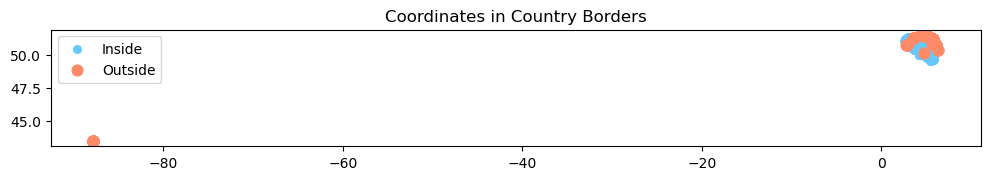

In [58]:
fig, ax = plt.subplots(figsize=(12, 12))
country.plot(ax=ax, color='lightgrey', edgecolor='grey')
points_within.plot(ax=ax, color='#67c8fc', markersize=30, label='Inside')
geo_df[~geo_df.index.isin(points_within.index)].plot(ax=ax, color='#fc8a67', markersize=60, label='Outside')

plt.title("Coordinates in Country Borders")
plt.legend()
plt.show()

<h4>Inspect Rows with Outside Coordinates</h4>

In [59]:
points_outside[['Company Name', 'Latitude', 'Longitude']].drop_duplicates()

,Company Name,Latitude,Longitude
71,IPC Europe - I.P.C. EUROPE,43.499844,-87.844997
243,Kockartz Jérôme,50.695645,6.097178
572,Nele Dhont,51.464625,4.458329
720,Standard Fasel België,51.245967,5.536768
871,Vloerverwarming Oost Limburg,51.150151,5.817631
918,PETER STEEN,50.725972,2.808523
1015,VSB bvba,51.248892,5.537263
1073,Ploegsteert UTVA,50.706534,2.883922
1098,Logixx,50.712383,6.080495
1306,CERATEC SA,50.706534,2.883922


<h4>Remove Outliers</h4>

In [60]:
B_Original_df.drop(points_outside.index, inplace=True)
B_Original_df.reset_index(drop=True, inplace=True)

<h4>Resolve State/Regions</h4>

In [103]:
geolocator = Nominatim(user_agent="region_mapper", timeout=10)
geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)

def get_region_from_coords(lat, lon, country_filter=None):
    """
    Get region/province from coordinates using reverse geocoding
    """
    try:
        location = geocode((lat, lon), exactly_one=True, language='en')
        if location:
            address = location.raw.get('address', {})
            
            # Check if the location is in the desired country
            if country_filter and address.get('country') != country_filter:
                return np.nan
            
            # Try to get region from various address components
            region = (address.get('state') or 
                     address.get('province') or 
                     address.get('region') or
                     address.get('county'))
            
            return region
    except Exception as e:
        print(f"Error geocoding ({lat}, {lon}): {str(e)}")
    return np.nan

In [104]:
def geocode_regions(df, lat_col='Latitude', lon_col='Longitude', country_filter=None):
    """
    Geocode regions for all rows in DataFrame
    """
    regions = []
    
    for idx, row in tqdm(df.iterrows(), total=len(df), desc="🌍 Geocoding regions"):
        region = get_region_from_coords(row[lat_col], row[lon_col], country_filter)
        regions.append(region)
    
    return regions

# Apply to your DataFrame
B_Original_df['region'] = geocode_regions(B_Original_df, country_filter='Belgium')

🌍 Geocoding regions: 100%|████████████████████████████████████████████████████| 13066/13066 [3:39:18<00:00,  1.01s/it]


<h4>Move 'region' to 'State'</h4>

In [106]:
B_Original_df['State'] = B_Original_df['region']

<h3>📝 Correct Incorrect Entries</h3>

<h4>Resolve Busines Model</h4>

In [61]:
B_Original_df['Business Model'].unique()

array(['OEM', 'Distributor', 'System Integrator'], dtype=object)

<h4>Resolve Category</h4>

In [62]:
Categories = B_Original_df['Category'].unique()
Categories.tolist()

['Agricultural Machinery',
 'Apparatus & Machinery for Chemical Industry',
 'Automatic Machinery & Equipment',
 'Boilers',
 'Castings',
 'Construction Machinery',
 'Conveyors',
 'Dryers',
 'Electric Machinery',
 'Equipment for Smelting Plant & Rolling Mills',
 'Equipment for Surface Finishing',
 'Fishing, Animal & Husbandry Machinery',
 'Food & Beverage Machinery',
 'Pharmaceutical Machinery',
 'Forging & Stamping Parts',
 'Freezing & Air Conditioning Equipment',
 'Grinders, Crushes & Screen Machines',
 'Hardware, Metal Products & Products of Other Matherials',
 'Heat Treatment Equipment',
 'Household Machinery',
 'Hydraullic Presses, Hydraullic & Pneumatic Components',
 'Industrial Furnace',
 'Industrial Turnkey Plant',
 'Internal Combustion Engines',
 'Services',
 'Machinery for Rubber Industry',
 'Machinery for Processing Plastics',
 'Weighing Machines',
 'Welding & Cutting Machinery',
 'Mining Machinery',
 'Packaging Machinery',
 'Machinery for Leather Industry',
 'Textile Machiner

In [63]:
len(Categories)

63

In [64]:
categories_mapping = {
    'Boilers': 'Boiler',
    'Castings': 'Hardware, Metal Products & Other Products of Materials',
    'Conveyors': 'Conveyor',
    'Food & Beverage Machinery': 'Food Machinery',
    'Forging & Stamping Parts': 'Forging & Stamping',
    'Grinders, Crushes & Screen Machines': 'Grinders, Crushers & Screen Machines',
    'Hardware, Metal Products & Products of Other Matherials': 'Hardware, Metal Products & Other Products of Materials',
    'Hydraullic Presses, Hydraullic & Pneumatic Components': 'Hydraulic Presses, Pneumatic & Hydraulic Machinery',
    'Services': 'Subcontract Services',
    'Weighing Machines': 'Weighing Machine',
    'Metal Forming Machine Tools': 'Metal Forming Machinery',
    'Planning, Consulting, & Construction of Complete Industrial Plants': 'Planning, Consulting & Construction of Complete Industrial Plant',
    'Metal Cutting Tool': 'Metal Cutting Tools',
    'Machinery for Non-Metallic Mineral Products Industries': 'Machinery for Non-metallic Mineral Products',
    'Printing & Binding Machinery': 'Binding Machinery',
    'Tools, Cutters, Moulds & Dies': 'Tools, Cutters, Moulds, & Dies',
    'Machinery Parts & Components': 'Hardware, Metal Products & Other Products of Materials',
    'Sewing Machinery': 'Sewing Machine',
    'NC Machine Tools': 'NC Machines',
    'Building automation': 'Automatic Machinery & Equipment',
    'Drives': 'Automatic Machinery & Equipment',
    'Controls, Drives, Motors': 'Automatic Machinery & Equipment',
    'Drives, Motors': 'Automatic Machinery & Equipment',
    'Agricultural Machinery': 'Agricultural Machinery',
    'Apparatus & Machinery for Chemical Industry': 'Apparatus & Machinery for Chemical Industry',
    'Dryers': 'Dryers',
    'Construction Machinery': 'Construction Machinery',
    'Electric Machinery': 'Electric Machinery',
    'Equipment for Smelting Plant & Rolling Mill': 'Equipment for Smelting Plant & Rolling Mill',
    'Equipment for Surface Finishing': 'Equipment for Surface Finishing',
    'Fishing, Animal & Husbandry Machinery': 'Fishing, Animal & Husbandry Machinery',
    'Pharmaceutical Machinery': 'Pharmaceutical Machinery',
    'Freezing & Air Conditioning Equipment': 'Freezing & Air Conditioning Equipment',
    'Heat Treatment Equipment': 'Heat Treatment Equipment',
    'Household Machinery': 'Household Machinery',
    'Industrial Furnace': 'Industrial Furnace',
    'Internal Combustion Engines': 'Internal Combustion Engines',
    'Machinery for Rubber Industry': 'Machinery for Rubber Industry',
    'Machinery for Processing Plastics': 'Machinery for Processing Plastics',
    'Welding & Cutting Machinery': 'Welding & Cutting Machinery',
    'Mining Machinery': 'Mining Machinery',
    'Packaging Machinery': 'Packaging Machinery',
    'Machinery for Leather Industry': 'Machinery for Leather Industry',
    'Textile Machinery': 'Textile Machinery',
    'Repair, Maintenance & Installation of Machinery': 'Repair, Maintenance & Installation of Machinery',
    'Pumps, Fans, Compressors & Vacuum Pumps': 'Pumps, Fans, Compressors & Vacuum Pumps',
    'Precision Machinery, Inspecting & Testing Equipment': 'Precision Machinery, Inspecting & Testing Equipment',
    'Special Machine Tools': 'Special Machine Tools',
    'Woodworking Machinery': 'Woodworking Machinery',
    'Pollution Control Equipment': 'Pollution Control Equipment',
    'Machinery for Clothing Industry': 'Machinery for Clothing Industry',
    'Office Machinery': 'Office Machinery',
    'Material Handling Machinery': 'Material Handling Machinery',
    'Refrigerating Equipment': 'Refrigerating Equipment',
    'Transportation Equipment': 'Transportation Equipment',
    'Piping System': 'Piping System',
    'Shoe Making Machinery': 'Shoe Making Machinery',
    'Paper Making & Converting Machinery': 'Paper Making & Converting Machinery',
    'Inverter': 'Inverter',
    'd': np.nan,
}

In [65]:
B_Original_df['Category'] = B_Original_df['Category'].map(categories_mapping)

In [66]:
unmapped = B_Original_df[B_Original_df['Category'].isna() & B_Original_df['Category'].notna()]['Category'].unique()
unmapped

array([], dtype=object)

In [67]:
Categories = B_Original_df['Category'].unique()
Categories.tolist()

['Agricultural Machinery',
 'Apparatus & Machinery for Chemical Industry',
 nan,
 'Boiler',
 'Hardware, Metal Products & Other Products of Materials',
 'Construction Machinery',
 'Conveyor',
 'Dryers',
 'Electric Machinery',
 'Equipment for Surface Finishing',
 'Fishing, Animal & Husbandry Machinery',
 'Food Machinery',
 'Pharmaceutical Machinery',
 'Forging & Stamping',
 'Freezing & Air Conditioning Equipment',
 'Grinders, Crushers & Screen Machines',
 'Heat Treatment Equipment',
 'Household Machinery',
 'Hydraulic Presses, Pneumatic & Hydraulic Machinery',
 'Industrial Furnace',
 'Internal Combustion Engines',
 'Subcontract Services',
 'Machinery for Rubber Industry',
 'Machinery for Processing Plastics',
 'Weighing Machine',
 'Welding & Cutting Machinery',
 'Mining Machinery',
 'Packaging Machinery',
 'Machinery for Leather Industry',
 'Textile Machinery',
 'Metal Forming Machinery',
 'Planning, Consulting & Construction of Complete Industrial Plant',
 'Repair, Maintenance & Install

In [68]:
len(Categories)

54

<h4>Resolve Subcategory</h4>

In [69]:
B_Original_df['Subcategory'] = B_Original_df['Subcategory'].str.title()

In [70]:
Subcategories = B_Original_df['Subcategory'].unique()
Subcategories

array(['Durable Goods, Nec',
       'Iron Work, Structural , Fabricated Structural Metal, Nec , Headers , Bar, Rod, And Wire Products , Safes And Vaults, Metal , Internal Combustion Engines, Nec , Reduction Gears And Gear Units For Turbines, Except Auto , Kilns , Excavators: Cable, Clamshell, Crane, Derrick, Dragline, Etc. , Jack Screws , Environmental Controls , Electrical Industrial Apparatus, Nec , Farm Machinery And Equipment , Metalworking Machinery, Nec , Hand And Edge Tools, Nec , Construction Machinery , Food Products Machinery , Textile Machinery , Paper Industries Machinery, Nec , Travel Trailers And Campers , Freight Cars And Equipment , Bar, Restaurant And Cafeteria Furniture , Repair Services, Nec , Fire Detection And Burglar Alarm Systems Specialization , Top And Body Repair And Paint Shops , Household Furniture , Cork Products, Fabricated , Farm Implements , Construction And Mining Machinery , Textile Machinery And Equipment , Office Equipment , Industrial Machinery And 

<h4>Resolve State</h4>

In [71]:
B_Original_df['State'].sort_values().unique().tolist()

['AALST',
 'ANTWERPEN',
 'Aalst',
 'Aalter',
 'Aarschot',
 'Aartselaar',
 'Affligem',
 'Aiseau-Presles',
 'Alken',
 'Almere',
 'Alveringem',
 'Amay',
 'Amel',
 'Andenne',
 'Anderlecht',
 'Anderlues',
 'Anhée',
 'Ans',
 'Anthisnes',
 'Antoing',
 'Antwerp',
 'Antwerpen',
 'Anzegem',
 'Appingedam',
 'Ardooie',
 'Arendonk',
 'Arlon',
 'As',
 'Asse',
 'Assenede',
 'Assesse',
 'Ath',
 'Attert',
 'Aubange',
 'Aubel',
 'Avelgem',
 'Awans',
 'Aywaille',
 'BONN',
 'Baal, Tremelo',
 'Baasrode, Dendermonde',
 'Baelen',
 'Balen',
 'Barchon',
 'Bassenge',
 'Bastogne',
 'Beaumont',
 'Beauraing',
 'Beauvechain',
 'Beernem',
 'Beerse',
 'Beersel',
 'Begijnendijk',
 'Bekkevoort',
 'Bellem, Aalter',
 'Beloeil',
 'Belsele, Sint-Niklaas',
 'Beringen',
 'Berlaar',
 'Berlare',
 'Bernissart',
 'Bertem',
 'Bertogne',
 'Bertrix',
 'Beselare, Zonnebeke',
 'Bever',
 'Beveren',
 'Beyne-Heusay',
 'Bierbeek',
 'Bilzen',
 'Binche',
 'Bissegem, Kortrijk',
 'Bièvre',
 'Blankenberge',
 'Blégny',
 'Bocholt',
 'Boechout',

In [72]:
# Mapping of Belgian towns to provinces/regions
belgian_provinces = {
    # Brussels Capital Region
    'Brussel': 'Brussels-Capital',
    'Brussels': 'Brussels-Capital',
    'Schaarbeek': 'Brussels-Capital',
    'Etterbeek': 'Brussels-Capital',
    'Ixelles': 'Brussels-Capital',
    'Uccle': 'Brussels-Capital',
    'Watermael-Boitsfort': 'Brussels-Capital',
    'Woluwe-Saint-Lambert': 'Brussels-Capital',
    'Woluwe-Saint-Pierre': 'Brussels-Capital',
    'Anderlecht': 'Brussels-Capital',
    'Saint-Gilles': 'Brussels-Capital',
    'Jette': 'Brussels-Capital',
    'Koekelberg': 'Brussels-Capital',
    'Berchem-Sainte-Agathe': 'Brussels-Capital',
    'Ganshoren': 'Brussels-Capital',
    'Molenbeek-Saint-Jean': 'Brussels-Capital',
    'Saint-Josse-ten-Noode': 'Brussels-Capital',
    'Forest': 'Brussels-Capital',
    
    # Flanders Region
    'Antwerpen': 'Antwerp',
    'Antwerp': 'Antwerp',
    'Mechelen': 'Antwerp',
    'Turnhout': 'Antwerp',
    'Lier': 'Antwerp',
    'Geel': 'Antwerp',
    'Boom': 'Antwerp',
    'Mol': 'Antwerp',
    'Borsbeek': 'Antwerp',
    'Brasschaat': 'Antwerp',
    'Heist-op-den-Berg': 'Antwerp',
    'Herentals': 'Antwerp',
    'Hoogstraten': 'Antwerp',
    'Kapellen': 'Antwerp',
    'Kontich': 'Antwerp',
    'Mortsel': 'Antwerp',
    'Schilde': 'Antwerp',
    'Wijnegem': 'Antwerp',
    'Zandhoven': 'Antwerp',
    'Zoersel': 'Antwerp',
    
    'Gent': 'East Flanders',
    'Ghent': 'East Flanders',
    'Aalst': 'East Flanders',
    'Sint-Niklaas': 'East Flanders',
    'Dendermonde': 'East Flanders',
    'Lokeren': 'East Flanders',
    'Oudenaarde': 'East Flanders',
    'Ronse': 'East Flanders',
    'Ninove': 'East Flanders',
    'Deinze': 'East Flanders',
    'Eeklo': 'East Flanders',
    'Zottegem': 'East Flanders',
    'Beveren': 'East Flanders',
    'Temse': 'East Flanders',
    'Wetteren': 'East Flanders',
    
    'Brugge': 'West Flanders',
    'Bruges': 'West Flanders',
    'Kortrijk': 'West Flanders',
    'Ostend': 'West Flanders',
    'Oostende': 'West Flanders',
    'Roeselare': 'West Flanders',
    'Ypres': 'West Flanders',
    'Ieper': 'West Flanders',
    'Veurne': 'West Flanders',
    'Diksmuide': 'West Flanders',
    'Poperinge': 'West Flanders',
    'Tielt': 'West Flanders',
    'Waregem': 'West Flanders',
    'Zwevegem': 'West Flanders',
    'Menen': 'West Flanders',
    'Wevelgem': 'West Flanders',
    
    'Hasselt': 'Limburg',
    'Genk': 'Limburg',
    'Sint-Truiden': 'Limburg',
    'Tongeren': 'Limburg',
    'Maaseik': 'Limburg',
    'Beringen': 'Limburg',
    'Leopoldsburg': 'Limburg',
    'Lommel': 'Limburg',
    'Heusden-Zolder': 'Limburg',
    'Bilzen': 'Limburg',
    'Dilsen-Stokkem': 'Limburg',
    'Hamont-Achel': 'Limburg',
    'Houthalen-Helchteren': 'Limburg',
    'Overpelt': 'Limburg',
    'Peer': 'Limburg',
    
    'Leuven': 'Flemish Brabant',
    'Louvain': 'Flemish Brabant',
    'Vilvoorde': 'Flemish Brabant',
    'Tienen': 'Flemish Brabant',
    'Diest': 'Flemish Brabant',
    'Aarschot': 'Flemish Brabant',
    'Zaventem': 'Flemish Brabant',
    'Halle': 'Flemish Brabant',
    'Grimbergen': 'Flemish Brabant',
    'Liedekerke': 'Flemish Brabant',
    'Overijse': 'Flemish Brabant',
    'Rotselaar': 'Flemish Brabant',
    'Tervuren': 'Flemish Brabant',
    'Wemmel': 'Flemish Brabant',
    
    # Wallonia Region
    'Liège': 'Liège',
    'Liege': 'Liège',
    'Verviers': 'Liège',
    'Seraing': 'Liège',
    'Herstal': 'Liège',
    'Ans': 'Liège',
    'Saint-Nicolas': 'Liège',
    'Eupen': 'Liège',
    'Dison': 'Liège',
    'Spa': 'Liège',
    'Theux': 'Liège',
    'Visé': 'Liège',
    'Aubel': 'Liège',
    'Beyne-Heusay': 'Liège',
    'Fléron': 'Liège',
    'Herve': 'Liège',
    'Olne': 'Liège',
    'Soumagne': 'Liège',
    'Trooz': 'Liège',
    
    'Charleroi': 'Hainaut',
    'Mons': 'Hainaut',
    'Tournai': 'Hainaut',
    'La Louvière': 'Hainaut',
    'Mouscron': 'Hainaut',
    'Ath': 'Hainaut',
    'Binche': 'Hainaut',
    'Châtelet': 'Hainaut',
    'Soignies': 'Hainaut',
    'Thuin': 'Hainaut',
    'Fleurus': 'Hainaut',
    'Manage': 'Hainaut',
    'Morlanwelz': 'Hainaut',
    'Enghien': 'Hainaut',
    'Estinnes': 'Hainaut',
    
    'Namur': 'Namur',
    'Dinant': 'Namur',
    'Philippeville': 'Namur',
    'Ciney': 'Namur',
    'Andenne': 'Namur',
    'Gembloux': 'Namur',
    'Rochefort': 'Namur',
    'Profondeville': 'Namur',
    'Beauraing': 'Namur',
    'Couvin': 'Namur',
    'Floreffe': 'Namur',
    'Fosses-la-Ville': 'Namur',
    'Gedinne': 'Namur',
    'Walcourt': 'Namur',
    'Yvoir': 'Namur',
    
    'Arlon': 'Luxembourg',
    'Bastogne': 'Luxembourg',
    'Marche-en-Famenne': 'Luxembourg',
    'Neufchâteau': 'Luxembourg',
    'Bouillon': 'Luxembourg',
    'Durbuy': 'Luxembourg',
    'La Roche-en-Ardenne': 'Luxembourg',
    'Libramont-Chevigny': 'Luxembourg',
    'Saint-Hubert': 'Luxembourg',
    'Vielsalm': 'Luxembourg',
    'Virton': 'Luxembourg',
    'Habay': 'Luxembourg',
    'Paliseul': 'Luxembourg',
    'Tellin': 'Luxembourg',
    'Tenneville': 'Luxembourg',
    
    'Wavre': 'Walloon Brabant',
    'Nivelles': 'Walloon Brabant',
    'Tubize': 'Walloon Brabant',
    'Braine-lAlleud': 'Walloon Brabant',
    'Braine-le-Château': 'Walloon Brabant',
    'Chastre': 'Walloon Brabant',
    'Court-Saint-Étienne': 'Walloon Brabant',
    'Genappe': 'Walloon Brabant',
    'Ittre': 'Walloon Brabant',
    'Jodoigne': 'Walloon Brabant',
    'Mont-Saint-Guibert': 'Walloon Brabant',
    'Orp-Jauche': 'Walloon Brabant',
    'Perwez': 'Walloon Brabant',
    'Ramillies': 'Walloon Brabant',
    'Rebecq': 'Walloon Brabant',
    'Rixensart': 'Walloon Brabant',
    'Villers-la-Ville': 'Walloon Brabant',
    'Walhain': 'Walloon Brabant',
    'Waterloo': 'Walloon Brabant',
    
    # Add more towns as needed...
}

# Create a list of known Belgian towns
belgian_towns = list(belgian_provinces.keys())

In [73]:
towns = B_Original_df['State'].sort_values().unique().tolist()

In [74]:
B_Original_df['State'] = B_Original_df['State'].map(belgian_provinces)

In [75]:
B_Original_df['State'] = B_Original_df['State'].where(B_Original_df['State'].notna(), None)

In [76]:
unmapped_towns = B_Original_df[B_Original_df['State'].isna() & B_Original_df['State'].notna()]['State'].unique()

In [77]:
unmapped_towns

array([], dtype=object)

In [78]:
State_mode = B_Original_df['State'].mode()

In [79]:
State_mode

0    Antwerp
Name: State, dtype: object

In [80]:
B_Original_df['State'] = B_Original_df['State'].fillna(State_mode)

In [81]:
B_Original_df.head(5)

,Business Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,E-mail,Annual Sales,Employees
0,OEM,Agricultural Machinery,"Durable Goods, Nec",ener Sinan,"Breughelpark 1, Internal Mail Reference 34,Zel...",50.884504,4.271891,Antwerp,Belgium,+32497255932,NaN,NaN,NaN,141353.0,1
1,OEM,Agricultural Machinery,"Iron Work, Structural , Fabricated Structural ...",Constructiewerken De Meyer,"Frank Van Dyckelaan 28,Temse,Belgium,9140",51.117833,4.195308,East Flanders,Belgium,+3237663333,NaN,NaN,NaN,<NA>,<NA>
2,OEM,Agricultural Machinery,Farm Machinery And Equipment,CNH Industrial - Zedelgem,"Léon Claeysstraat 3 A,Zedelgem,Belgium,8210",51.129273,3.161403,NaN,Belgium,+3250253111,NaN,www.cnhindustrial.com/,NaN,2164409300.0,3523
3,OEM,Agricultural Machinery,Automobiles And Other Motor Vehicles,MOLCON INTERWHEELS,"Hoogveld 56,Dendermonde,Belgium,9200",51.026328,4.139792,East Flanders,Belgium,+3252259010,NaN,www.molconinterwheels.com/nl-be/,sales.nl@molconinterwheels.com,50544497.43,42
4,OEM,Agricultural Machinery,"Durable Goods, Nec",CELAVI,"Kolenmarkt 76,Brussel,Belgium,1000",50.845794,4.348448,Brussels-Capital,Belgium,+3224102192,NaN,www.mommerency.be/,NaN,171000.0,4


<h4>Resolve Country</h4>

In [82]:
B_Original_df['Country'].unique()

array(['Belgium'], dtype=object)

<h4>Resolve Annual Sales</h4>

In [83]:
Annual_Sales_mean = round(B_Original_df['Annual Sales'].mean())

In [84]:
B_Original_df['Annual Sales'] = B_Original_df['Annual Sales'].fillna(Annual_Sales_mean)

<h4>Resolve Employees</h4>

In [85]:
Employees_mean = round(B_Original_df['Employees'].mean())

In [86]:
B_Original_df['Employees'] = B_Original_df['Employees'].fillna(Employees_mean)

<h3>📈 Detect and Treat Outliers</h3>

In [92]:
plt.style.use('fivethirtyeight')

<h4>Check Latitude</h4>

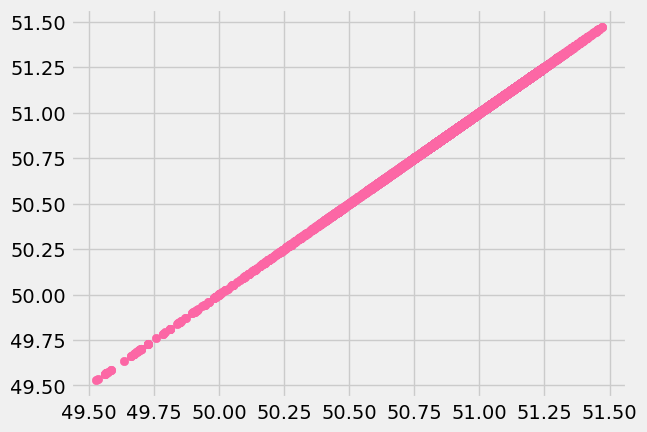

In [93]:
plt.scatter(B_Original_df['Latitude'], B_Original_df['Latitude'], color='#fc67a5')
plt.show()

<h4>Check Longitude</h4>

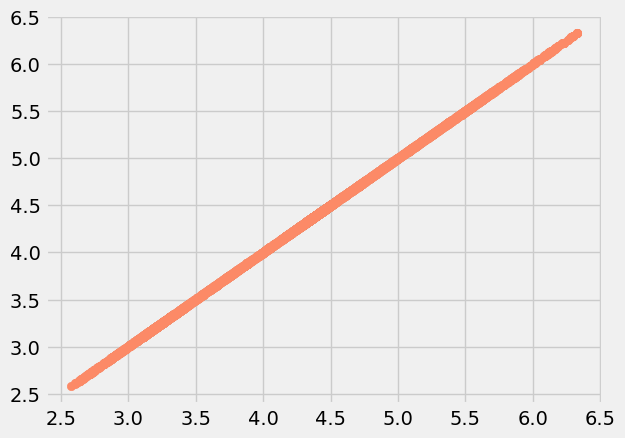

In [94]:
plt.scatter(B_Original_df['Longitude'], B_Original_df['Longitude'], color='#fc8a67')
plt.show()

<h4>Check Annual Sales</h4>

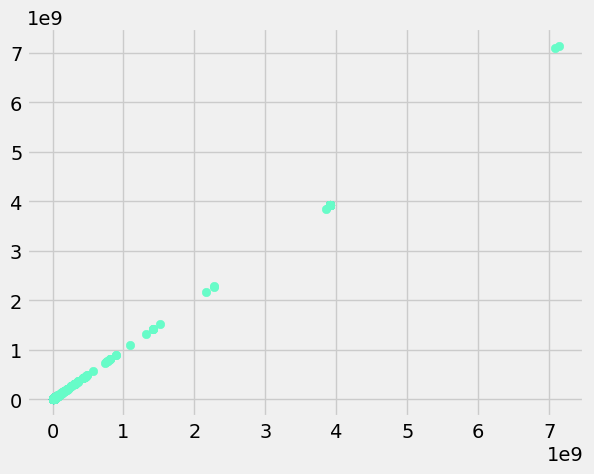

In [95]:
plt.scatter(B_Original_df['Annual Sales'], B_Original_df['Annual Sales'], color='#67fcc8')
plt.show()

<h4>Check Employees</h4>

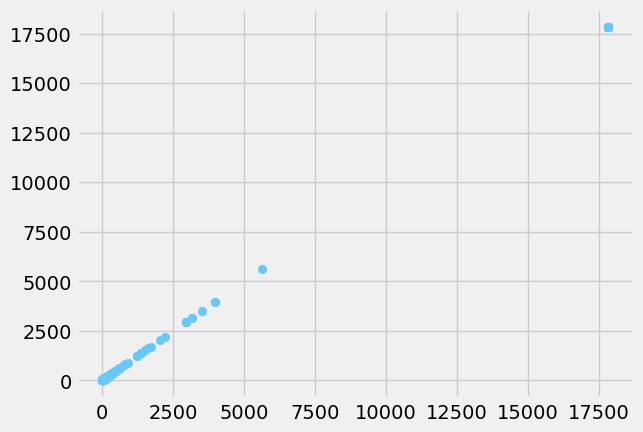

In [96]:
plt.scatter(B_Original_df['Employees'], B_Original_df['Employees'], color='#67c8fc')
plt.show()

So far, there are <b>no outliers</b> in the dataset.

<h2>🔎 Finalize Dataset</h2>

<h3>Check Data Types</h3>

In [97]:
B_Original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13066 entries, 0 to 13065
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Business Model  13066 non-null  object 
 1   Category        12819 non-null  object 
 2   Subcategory     5946 non-null   object 
 3   Company Name    13064 non-null  object 
 4   Address         13066 non-null  object 
 5   Latitude        13066 non-null  float64
 6   Longitude       13066 non-null  float64
 7   State           6341 non-null   object 
 8   Country         13066 non-null  object 
 9   Contact No.     6079 non-null   object 
 10  Fax No.         299 non-null    object 
 11  Website         2600 non-null   object 
 12  E-mail          1097 non-null   object 
 13  Annual Sales    13066 non-null  Float64
 14  Employees       13066 non-null  Int64  
dtypes: Float64(1), Int64(1), float64(2), object(11)
memory usage: 1.5+ MB


<h3>Check For Null Values</h3>

In [98]:
B_Original_df.isnull().any()

Business Model    False
Category           True
Subcategory        True
Company Name       True
Address           False
Latitude          False
Longitude         False
State              True
Country           False
Contact No.        True
Fax No.            True
Website            True
E-mail             True
Annual Sales      False
Employees         False
dtype: bool

<h3>Summarize Dataset</h3>

In [99]:
B_Original_df.describe()

,Latitude,Longitude,Annual Sales,Employees
count,13066.000000,13066.000000,13066.0,13066.0
mean,50.904821,4.328656,40202904.824069,135.955533
std,0.272289,0.821853,236157536.234719,965.316513
min,49.527600,2.577205,160.0,1.0
25%,50.761775,3.655159,269000.0,2.0
50%,50.927899,4.372415,40202905.0,136.0
75%,51.116642,4.870586,40202905.0,136.0
max,51.471395,6.329392,7135011907.08,17833.0


<h3>Check Random Samples</h3>

In [109]:
B_Original_df.sample(5)

,Business Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,E-mail,Annual Sales,Employees
4869,OEM,"Grinders, Crushers & Screen Machines",NaN,LOONSCHAVERIJ DECORATION-WOOD,"Kasteelstraat 166,Buggenhout,Belgium,9255",51.003804,4.207850,East Flanders,Belgium,NaN,NaN,NaN,NaN,40202905.0,136
10578,OEM,Welding & Cutting Machinery,NaN,LWA,"Bellemansheide 42,Sint-Genesius-Rode,Belgium,1640",50.741725,4.361097,Flemish Brabant,Belgium,NaN,NaN,NaN,NaN,40202905.0,136
8471,OEM,"Pumps, Fans, Compressors & Vacuum Pumps",NaN,Customized,"Begoniastraat 51,Oudsbergen,Belgium,3670",51.092318,5.520080,Limburg,Belgium,NaN,NaN,NaN,NaN,40202905.0,136
9831,OEM,Metal Cutting Tools,NaN,HORIZON RETAIL INVESTERINGEN MVV,"Oud Vliegveld 12,Oostende,Belgium,8400",51.207767,2.908088,West Flanders,Belgium,+3256841229,NaN,NaN,NaN,40202905.0,136
8831,OEM,Textile Machinery,NaN,DIDAK INJECTION,"Industrieweg 1,Grobbendonk,Belgium,2280",51.178806,4.745746,Antwerp,Belgium,+3214507960,NaN,NaN,NaN,40202905.0,136


In [108]:
del B_Original_df['region']

<h2>📥 Download Dataset</h2>

In [110]:
B_Original_df.to_csv('datasets\output\Dataset_Belgium_cleaned.csv', index=False)

<h2>💌 Credits ✉️</h2>

This project is done by <b>ERMITANO, Kate Justine</b> as a part of the internship tasks under the instructions of <b>Miss Fherlyn Charl Yet</b>.